<a href="https://colab.research.google.com/github/AdharshReddyC/Linear_Regression_Jamboree_CaseStudy/blob/main/Business_Case_Jamboree_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Jamboree aims to help students understand their chances of getting into top colleges abroad through their website's admission prediction feature. To enhance this, we will analyze factors like GRE scores, TOEFL scores, university ratings, and GPA to identify what truly impacts graduate admissions. This analysis will help Jamboree provide better guidance to students and improve the accuracy of their admission prediction tool.


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/Jamboree_Admission.csv')

In [ ]:
df.head() # Display the first 5 rows of the dataset


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Shape of the data

In [ ]:
df.shape # Check the shape of the dataset


(500, 9)

## Dropping serial No column

In [ ]:
df = df.drop(['Serial No.'], axis=1)

## Comprehensive overview of the DataFrame

In [ ]:
df.info() #comprehensive overview of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## Summary:
- The DataFrame has 500 entries and 8 columns, with no missing values.
- All columns are populated, consisting of integers and floats






## Missing Value detection

In [ ]:
df.isnull().sum() #missing values

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


- There are no missing values in the dataset.


## Key Statistics of the Dataset


In [ ]:
df.describe()  #stastical summery

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Converthing categorical attributes to 'category' data type

In [ ]:
# Convert the 'Research' column to categorical type
df['Research'] = df['Research'].astype('category')

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## Removing extra spaces in the column names

In [ ]:
df.rename(columns = {'LOR ':'LOR'}, inplace = True)
df.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)


## Checking distribution of the data

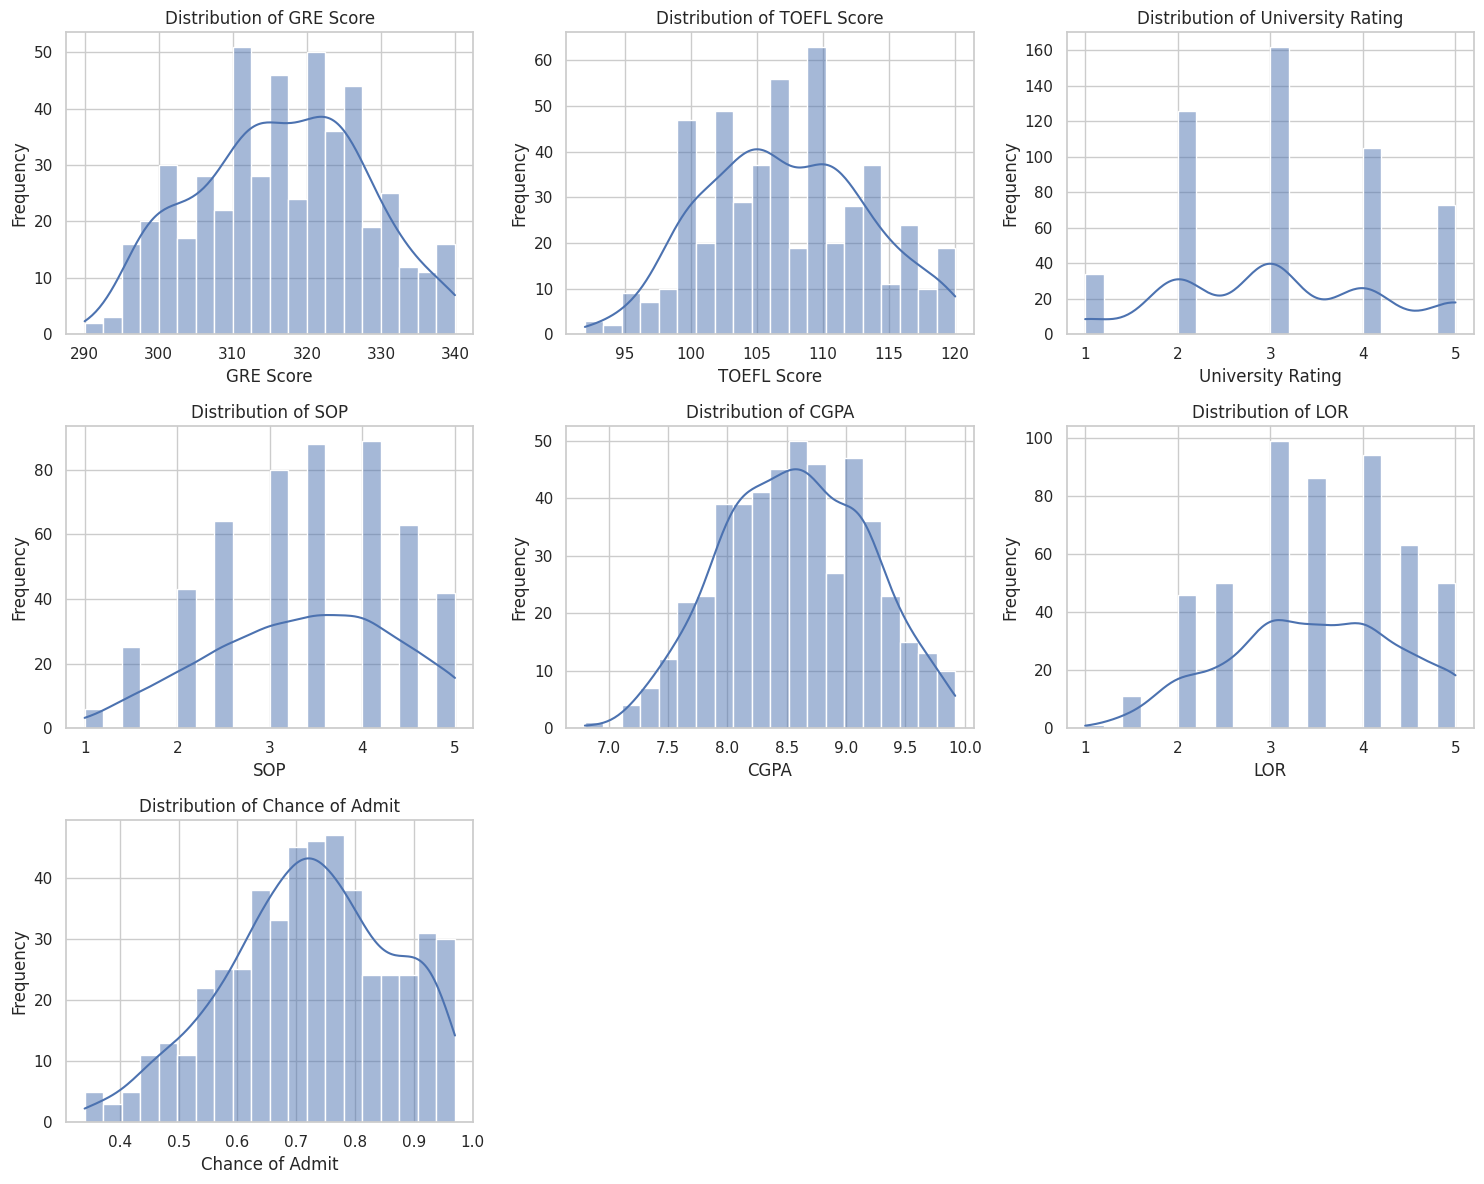

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the list of numerical columns to plot
numerical_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'LOR', 'Chance of Admit']

# Create subplots for each numerical column
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- From the plots it is cleat that students with varying merits apply for the universities
- Almost all the features follow the normal distribution

## Plotting each numerical column against 'Chance of Admit' with hue set to 'Research'

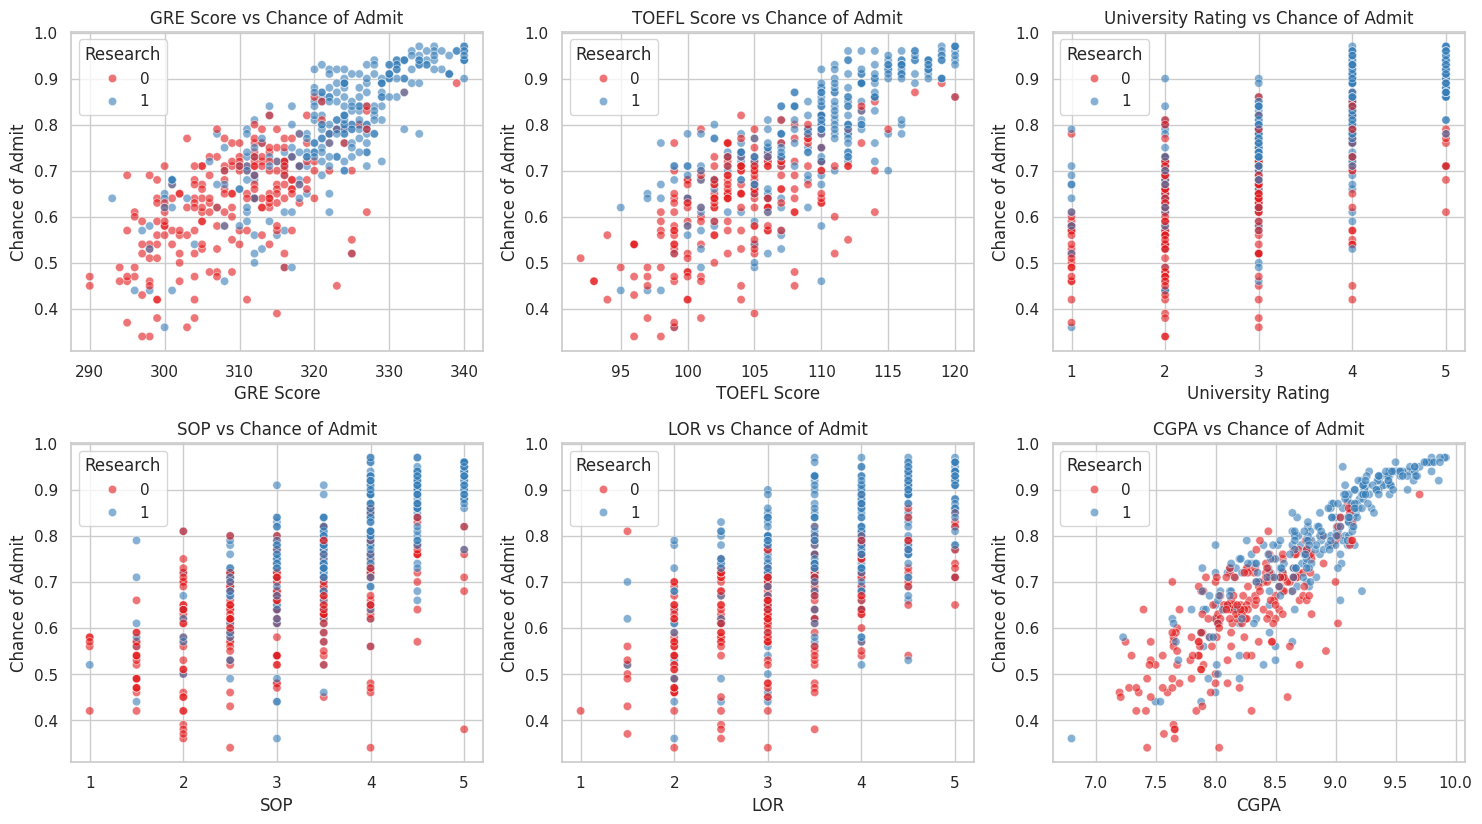

In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(15, 12))

bivariate_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']

# Create scatter plots for each numerical column against 'Chance of Admit' with hue set to 'Research'
for i, col in enumerate(bivariate_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y='Chance of Admit', hue='Research', alpha=0.6, palette='Set1')
    plt.title(f'{col} vs Chance of Admit')
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')

plt.tight_layout()
plt.show()


- From the plots it is clear that almost all the featues exhiit linear relationship with the target feature

## Bivariate Analysis: Relationship between numerical features

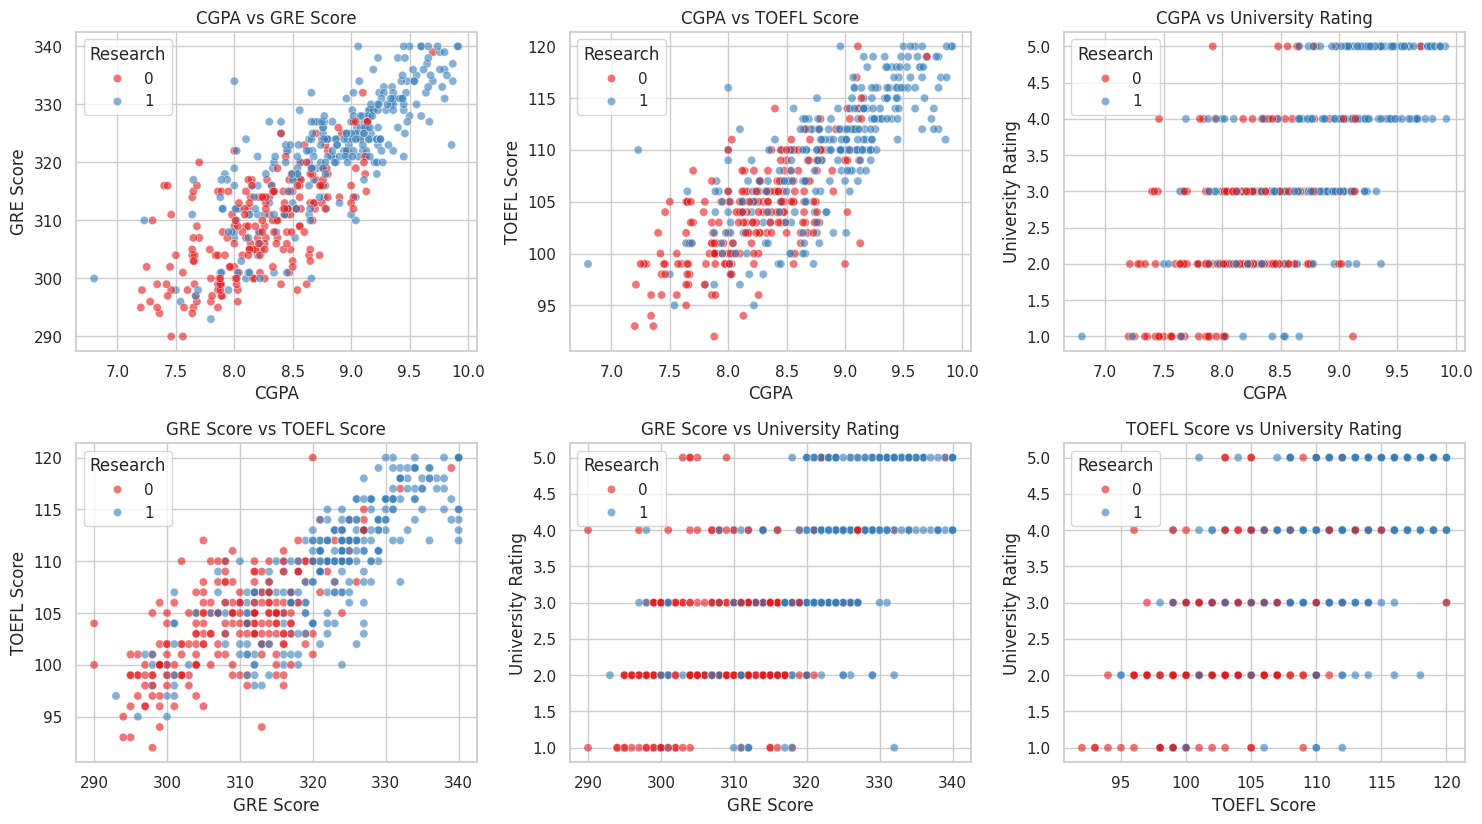

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 12))

# Define pairs of features for bivariate analysis
feature_pairs = [('CGPA', 'GRE Score'),
                 ('CGPA', 'TOEFL Score'),
                 ('CGPA', 'University Rating'),
                 ('GRE Score', 'TOEFL Score'),
                 ('GRE Score', 'University Rating'),
                 ('TOEFL Score', 'University Rating')]

# Create scatter plots for each pair of features
for i, (x_col, y_col) in enumerate(feature_pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.6, hue='Research', palette='Set1')
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()


- From the plot it is clear that we have correlated features in our dataset

## Correlation Heatmap

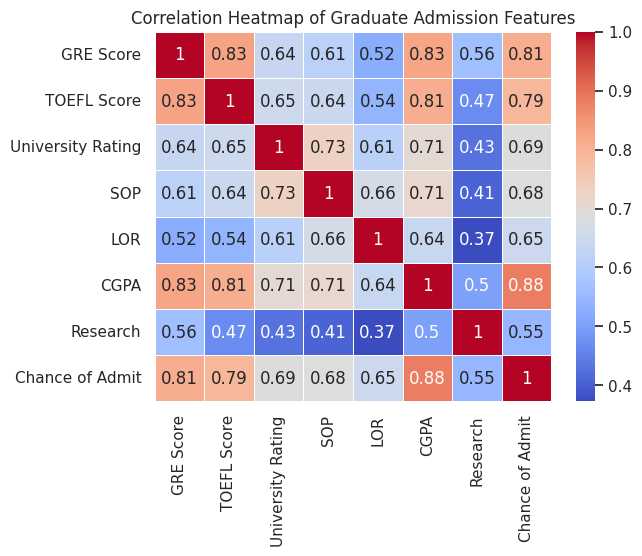

In [ ]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap of Graduate Admission Features')
plt.show()

- From the heat map it is clear that features like CGPA and TOEFL score & CGPA & GRE score are heavily correlated

## Splitting the dataset into Testing data and Training data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)


In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
1,324,107,4,4.0,4.5,8.87,1
148,339,116,4,4.0,3.5,9.80,1
386,302,101,2,2.5,3.5,7.96,0
274,315,100,1,2.0,2.5,7.95,0
126,323,113,3,4.0,3.0,9.32,1
...,...,...,...,...,...,...,...
98,332,119,4,5.0,4.5,9.24,1
154,326,108,3,3.0,3.5,8.89,0
189,324,112,5,5.0,5.0,9.08,1
66,327,114,3,3.0,3.0,9.02,0


In [ ]:
y_train

,Chance of Admit
1,0.76
148,0.96
386,0.46
274,0.58
126,0.85
...,...
98,0.90
154,0.80
189,0.88
66,0.61


# Standardization using StandardScaler library

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)




In [ ]:
X_train_std

array([[ 0.67479841, -0.01818096,  0.72864837, ...,  1.07598439,
         0.49024295,  0.8819171 ],
       [ 2.00795298,  1.5039462 ,  0.72864837, ...,  0.        ,
         2.02676986,  0.8819171 ],
       [-1.28049497, -1.0329324 , -1.01140744, ...,  0.        ,
        -1.01324037, -1.13389342],
       ...,
       [ 0.67479841,  0.82744524,  1.59867627, ...,  1.61397658,
         0.83720064,  0.8819171 ],
       [ 0.94142932,  1.16569572, -0.14137953, ..., -0.53799219,
         0.73806988, -1.13389342],
       [ 0.67479841,  0.65832   , -0.14137953, ..., -1.61397658,
         0.37459039,  0.8819171 ]])

In [ ]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)


In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.674798,-0.018181,0.728648,0.616695,1.075984,0.490243,0.881917
1,2.007953,1.503946,0.728648,0.616695,0.000000,2.026770,0.881917
2,-1.280495,-1.032932,-1.011407,-0.918645,0.000000,-1.013240,-1.133893
3,-0.125094,-1.202058,-1.881435,-1.430426,-1.075984,-1.029762,-1.133893
4,0.585921,0.996570,-0.141380,0.616695,-0.537992,1.233724,0.881917
...,...,...,...,...,...,...,...
395,1.385814,2.011322,0.728648,1.640255,1.075984,1.101549,0.881917
396,0.852552,0.150944,-0.141380,-0.406865,0.000000,0.523287,-1.133893
397,0.674798,0.827445,1.598676,1.640255,1.613977,0.837201,0.881917
398,0.941429,1.165696,-0.141380,-0.406865,-0.537992,0.738070,-1.133893


# Implementing linear regression using sklearn

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train.values)

coefficients = lin_reg_model.coef_
intercept = lin_reg_model.intercept_
coeff_df = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])
coeff_df.loc['Intercept'] = intercept

# Display the coefficients
print(coeff_df)

predictions = lin_reg_model.predict(std.transform(X_test))
print('Linear Regression: ', (np.sqrt(mean_squared_error(y_test, predictions))))

                   Coefficient
GRE Score             0.018296
TOEFL Score           0.019282
University Rating     0.009992
SOP                  -0.001741
LOR                   0.015944
CGPA                  0.071986
Research              0.013056
Intercept             0.721225
Linear Regression:  0.05459170939822799


- **CGPA (0.0669)** had the most significant impact, while **University Rating (0.0095)** had the least.
- The RMSE (Root Mean Squared Error) was **0.0623**, indicating a good model fit with minimal prediction error.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r_squared = r2_score(y_test, predictions)
# Calculate Adjusted R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)

Mean Absolute Error: 0.042387923432174464
Root Mean Squared Error: 0.05459170939822799
R-squared: 0.8326786236005956
Adjusted R-squared: 0.8199476493093366


## Summary of Model Performance Metrics
- MAE: 0.0424 - Average prediction error, indicating good accuracy.
- RMSE: 0.0546 - Reflects overall error magnitude, with lower values indicating better fit.
- R²: 0.8327 - 83.27% of variance explained, suggesting a strong model fit.
- Adjusted R²: 0.8199 - Indicates that the model remains robust after accounting for the number of predictors.
- Overall, the model shows strong predictive performance with low error metrics.


## Implementing Lasso and Ridge with hyperparameter tuning

In [ ]:
# Import necessary libraries
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the range of alpha values to test
alpha_values = np.logspace(-4, 4, 100)  # 100 values from 10^-4 to 10^4

# Create a function to perform Grid Search for Lasso Regression
def lasso_regression(X_train, y_train):
    lasso = Lasso()
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the data
        ('lasso', lasso)
    ])
    param_grid = {'lasso__alpha': alpha_values}  # Alpha for Lasso
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

# Create a function to perform Grid Search for Ridge Regression
def ridge_regression(X_train, y_train):
    ridge = Ridge()
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the data
        ('ridge', ridge)
    ])
    param_grid = {'ridge__alpha': alpha_values}  # Alpha for Ridge
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

# Perform Lasso Regression with alpha tuning
lasso_results = lasso_regression(X_train, y_train.values)
best_lasso_alpha = lasso_results.best_params_['lasso__alpha']
best_lasso_score = np.sqrt(-lasso_results.best_score_)

# Perform Ridge Regression with alpha tuning
ridge_results = ridge_regression(X_train, y_train.values)
best_ridge_alpha = ridge_results.best_params_['ridge__alpha']
best_ridge_score = np.sqrt(-ridge_results.best_score_)

# Display the results
print(f"Best Lasso Alpha: {best_lasso_alpha}, RMSE: {best_lasso_score}")
print(f"Best Ridge Alpha: {best_ridge_alpha}, RMSE: {best_ridge_score}")


Best Lasso Alpha: 0.0009326033468832199, RMSE: 0.06212325248932216
Best Ridge Alpha: 8.497534359086455, RMSE: 0.06217689902522779


# Implementing linear regression using statsmodels library

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     253.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          3.48e-141
Time:                        17:26:14   Log-Likelihood:                 552.67
No. Observations:                 400   AIC:                            -1089.
Df Residuals:                     392   BIC:                            -1057.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7212      0.00

## OLS Regression Summary:

The OLS regression model achieved an **R-squared** value of **0.825**, indicating that 82.5% of the variability in admission chances is explained by the model. The **Adjusted R-squared** is **0.821**, confirming the model's strength.

- **Significant predictors**:
  - **CGPA** (coef: 0.0669, p < 0.001) was the most influential variable.
  - **GRE Score**, **TOEFL Score**, **LOR**, and **Research** also showed significant positive relationships.
- **Insignificant predictors**:
  - **SOP** and **University Rating** were not statistically significant at the 5% level.
- The **F-statistic** (263.3, p < 0.001) confirms that the model is a good fit overall.



## Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

In [ ]:
# Multicollinearity Check using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Initialize an empty DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("Initial VIF Scores:")
print(vif_data)

# Iteratively drop features with VIF > 5
while vif_data["VIF"].max() > 5:
    feature_to_drop = vif_data.sort_values(by="VIF", ascending=False)["Feature"].iloc[0]
    print(f"\nDropping feature '{feature_to_drop}' with VIF: {vif_data['VIF'].max()}")

    # Drop the feature from the copied dataset
    X_train = X_train.drop(columns=[feature_to_drop])

    # Recalculate VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    print("\nUpdated VIF Scores:")
    print(vif_data)


Initial VIF Scores:
             Feature       VIF
0              const  1.000000
1          GRE Score  4.503310
2        TOEFL Score  3.932746
3  University Rating  2.835767
4                SOP  2.766863
5                LOR  2.044770
6               CGPA  4.785439
7           Research  1.502593


- VIF scores are less than 5 for all the features

In [ ]:
X_train

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,0.674798,-0.018181,0.728648,0.616695,1.075984,0.490243,0.881917
1,1.0,2.007953,1.503946,0.728648,0.616695,0.000000,2.026770,0.881917
2,1.0,-1.280495,-1.032932,-1.011407,-0.918645,0.000000,-1.013240,-1.133893
3,1.0,-0.125094,-1.202058,-1.881435,-1.430426,-1.075984,-1.029762,-1.133893
4,1.0,0.585921,0.996570,-0.141380,0.616695,-0.537992,1.233724,0.881917
...,...,...,...,...,...,...,...,...
395,1.0,1.385814,2.011322,0.728648,1.640255,1.075984,1.101549,0.881917
396,1.0,0.852552,0.150944,-0.141380,-0.406865,0.000000,0.523287,-1.133893
397,1.0,0.674798,0.827445,1.598676,1.640255,1.613977,0.837201,0.881917
398,1.0,0.941429,1.165696,-0.141380,-0.406865,-0.537992,0.738070,-1.133893


## Mean of residuals

In [ ]:
residuals = y_test - predictions
mean_residuals = residuals.mean()
mean_residuals

0.0023907849522642193

- The mean of the residuals is approximately 0.0024, indicating that the model's predictions are unbiased overall.

## Linearity of variables

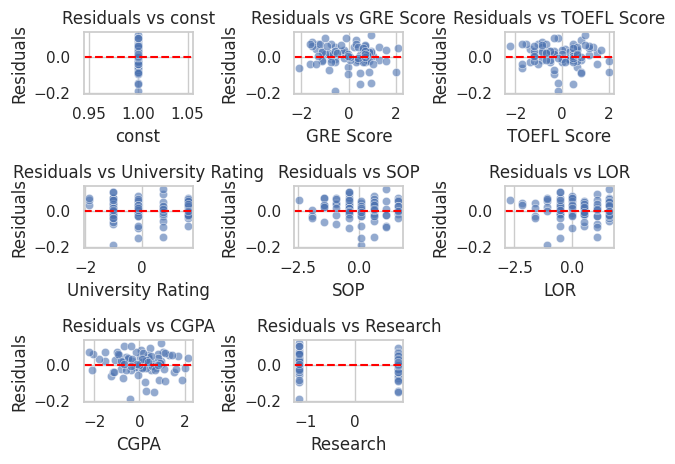

In [ ]:
# Plot residuals against each predictor variable
for i, col in enumerate(X_train.columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=X_train[col], y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs {col}')
    plt.xlabel(col)
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

- From the plots we could see linear relationship between predictors and the response variable

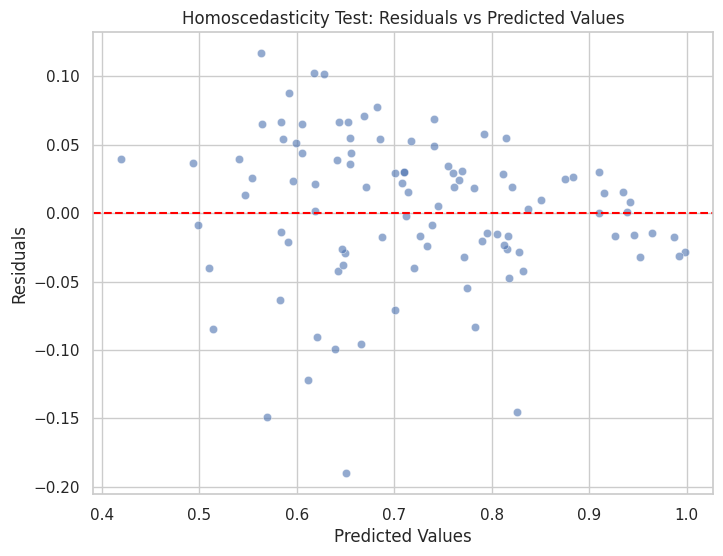

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Homoscedasticity Test: Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

- there's a visible funnel shape, it suggests heteroscedasticity (non-constant variance).








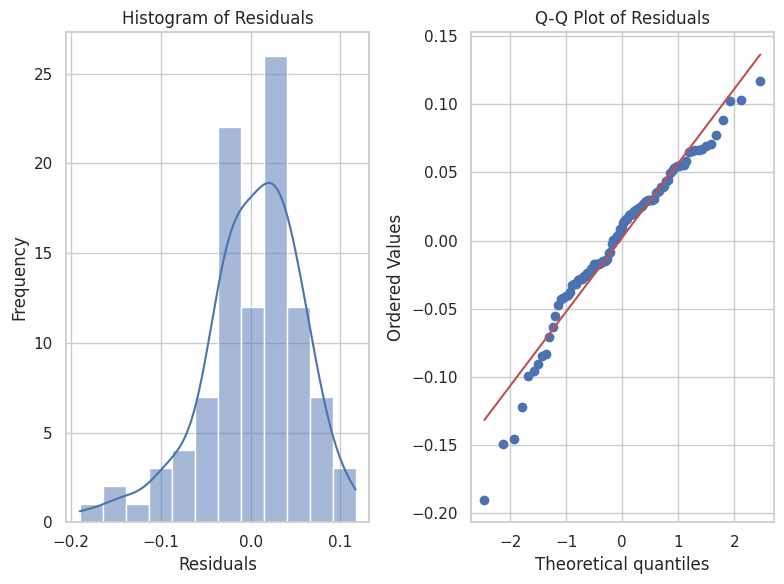

In [ ]:
# Plot histogram of residuals
import scipy.stats as stats

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

- The resduals are normally distributed as we can see bell-shaped curve in residuals distribution and points in QQ plot are almost all on the line

# Actionable Insights & Recommendations

## Significance of Predictor Variables
- The analysis shows that variables such as CGPA, GRE Score, and LOR are significant predictors of the 'Chance of Admit'.
- University Rating and TOEFL Score also contribute positively, suggesting that applicants from higher-rated institutions and with better language proficiency tend to have better admission prospects.

## Additional Data Sources for Model Improvement
- To enhance model accuracy, consider incorporating additional data sources such as:
Work experience, Extra curriculars, Essays, Group Discussions and Admission Interviews

## Model Implementation in the Real World
- Implementing this model in the admissions process can streamline decision-making by providing data-driven insights into applicant profiles.
- It can help admissions committees identify candidates with the highest potential for success in graduate programs.

## Potential Business Benefits
 By improving the model, institutions can:
- Helps attract high-quality applicants by identifying strong candidates
- Targeted marketing campaigns based on admission probability can reduce costs.
- Higher prediction accuracy aids in securing funding for promising students.








-